<a href="https://colab.research.google.com/github/BaruBangun/My_Learning/blob/main/Fraud_Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Belajar AI/creditcard_2023.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df = df.drop('id', axis=1)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state =1)

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)

In [ ]:
X_test = SC.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)

In [ ]:
X_test = lda.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='elu'))
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=8, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs = 5)

Epoch 1/5
12439/12439 [==============================] - 61s 4ms/step - loss: 0.1363 - accuracy: 0.9514
Epoch 2/5
12439/12439 [==============================] - 54s 4ms/step - loss: 0.1346 - accuracy: 0.9516
Epoch 3/5
12439/12439 [==============================] - 53s 4ms/step - loss: 0.1343 - accuracy: 0.9516
Epoch 4/5
12439/12439 [==============================] - 54s 4ms/step - loss: 0.1342 - accuracy: 0.9516
Epoch 5/5
12439/12439 [==============================] - 54s 4ms/step - loss: 0.1340 - accuracy: 0.9516


In [ ]:
y_pred = model.predict(X_test)

5331/5331 [==============================] - 9s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
y_pred = (y_pred>0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     85428
           1       0.96      0.94      0.95     85161

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



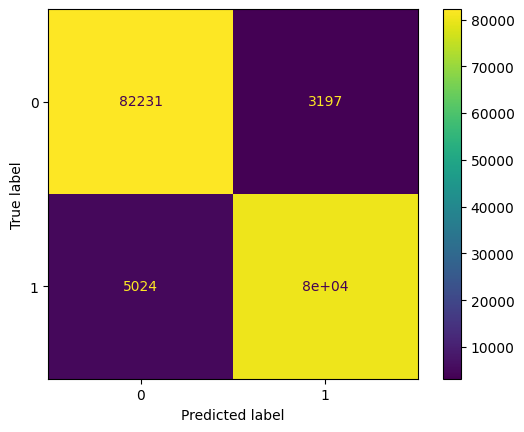

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(CM).plot()